In [1]:
import RL_samp
from RL_samp.header import *
from RL_samp.utils import *
from RL_samp.replay_buffer import *
from RL_samp.models import poly_net, val_net
from RL_samp.reconstructors import sigpy_solver
from RL_samp.policies import DQN
from RL_samp.trainers import DeepQL_trainer

from importlib import reload
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject
/opt/anaconda/envs/pyenv/lib/python3.9/site-packages/h5py/__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters


In [3]:
import torch.nn.functional as Func

In [53]:
datapath = '/mnt/shared_a/OCMR/OCMR_fully_sampled_images/'
ncfiles = list([])
for file in os.listdir(datapath):
    if file.endswith(".pt"):
        ncfiles.append(file)

In [ ]:
loader.reset()
iterMax = 2000
for ind in range(iterMax):
    loader.test()

In [ ]:
### DQN Parameter settings

## image parameters
heg = 192
wid = 144

## reconstructor parameters
max_iter = 50
L = 5e-3
solver = 'ADMM'

## trainer parameters
discount    = .5
memory_len  = 20
t_backtrack = 3
base        = 5
budget      = 13
episodes    = 1
save_freq   = 10
batch_size  = 2
ngpu        = 1
lr          = 1e-3
eps         = 1e-3
double_q    = False

In [ ]:
reload(RL_samp)
import RL_samp
import RL_samp.trainers
from RL_samp.trainers import DeepQL_trainer


In [ ]:
loader  = ocmrLoader(ncfiles,batch_size=1,t_backtrack=t_backtrack)
memory  = ReplayMemory(capacity=memory_len,
                       curr_obs_shape=(t_backtrack,heg,wid),
                       mask_shape=(wid),
                       next_obs_shape=(1,heg,wid),
                       batch_size=batch_size,
                       burn_in=batch_size)
model   = poly_net(samp_dim=wid)
policy  = DQN(model,memory,max_iter=max_iter,ngpu=ngpu,gamma=discount,lr=lr,double_q_mode=double_q,
              solver=solver,max_iter=max_iter,L=L)
trainer = DeepQL_trainer(loader,policy,episodes=episodes,
                         eps=eps,
                         base=base,budget=budget,
                         ngpu=ngpu)
trainer.train()

In [51]:
### AC1 Parameter settings

## image parameters
heg = 192
wid = 144

## reconstructor parameters
max_iter = 50
L = 5e-3
solver = 'ADMM'

## trainer parameters
discount    = .9
t_backtrack = 3
base        = 5
budget      = 13
episodes    = 1
save_freq   = 10
batch_size  = 2
ngpu        = 0
lr          = 1e-3
eps         = 1e-3
double_q    = False

In [ ]:
reload(RL_samp)
import RL_samp
from RL_samp.trainers import AC1_trainer

In [ ]:
loader  = ocmrLoader(ncfiles,batch_size=1,t_backtrack=t_backtrack)
p_net   = poly_net(samp_dim=wid,softmax=True)
v_net   = val_net()
trainer = AC1_trainer(loader, polynet=p_net, valnet=v_net,
                      base=base, budget=budget,
                      gamma=discount,
                      lr=lr,
                      solver=solver, max_iter=max_iter, L=L,
                      ngpu=ngpu)
trainer.run()

In [95]:
loader  = ocmrLoader(ncfiles,batch_size=1,t_backtrack=t_backtrack)
p_net   = poly_net(samp_dim=wid,softmax=True)
v_net   = val_net()
trainer = AC1_ET_trainer(loader, polynet=p_net, valnet=v_net,
                      base=base, budget=budget,
                      gamma=discount,
                      solver=solver, max_iter=max_iter, L=L,
                      ngpu=ngpu)

current file: fs_0045_3T.pt
Dimension of the current data file: t_ubd 19, slice_ubd 12, rep_ubd 1


In [96]:
trainer.run()

epoch [1/100] file [1/43] rep [1/1] slice [1/12]
step: 1, poly_loss: -4.8795, val_loss: 0.0009, reward: -0.0001, 
 mask sum: 6.0
step: 2, poly_loss: -4.8745, val_loss: 0.0008, reward: 0.0034, 
 mask sum: 7.0
step: 3, poly_loss: -4.8690, val_loss: 0.0055, reward: 0.0022, 
 mask sum: 8.0
step: 4, poly_loss: -4.8644, val_loss: 0.0087, reward: 0.0059, 
 mask sum: 9.0
step: 5, poly_loss: -4.8572, val_loss: 0.0208, reward: -0.0001, 
 mask sum: 10.0
step: 6, poly_loss: -4.8503, val_loss: 0.0147, reward: 0.0030, 
 mask sum: 11.0
step: 7, poly_loss: -4.8426, val_loss: 0.0187, reward: 0.0007, 
 mask sum: 12.0
step: 8, poly_loss: -4.8392, val_loss: 0.0140, reward: 0.0398, 
 mask sum: 13.0
step: 9, poly_loss: -4.8328, val_loss: 0.1513, reward: 0.0142, 
 mask sum: 14.0
step: 10, poly_loss: -4.8255, val_loss: 0.1469, reward: 0.0013, 
 mask sum: 15.0
~~ step 10: hist saved as AC1_ET_hist_base5_budget13.pt at directory /home/huangz78/rl_samp/~~
step: 11, poly_loss: -4.8178, val_loss: 0.0938, reward: -

TypeError: '<' not supported between instances of 'builtin_function_or_method' and 'float'

## view training history

In [2]:
hist_dir = '/home/huangz78/rl_samp/AC1_ET_hist_base5_budget13.pt'
data = torch.load(hist_dir)

In [3]:
hist = data['training_record']
print(hist.keys())

dict_keys(['poly_loss', 'val_loss', 'action_prob', 'v', 'poly_grad_norm', 'val_grad_norm', 'horizon_rewards', 'rmse', 'recon_samples', 'rmse_cmp'])


In [4]:
rmse = np.array(hist['rmse_cmp'])

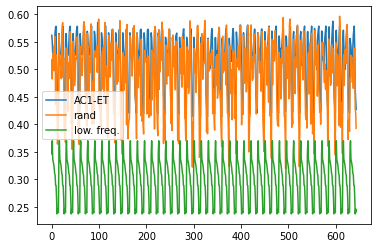

In [5]:
plt.figure()
plt.plot(rmse[:,0],label='AC1-ET')
plt.plot(rmse[:,1],label='rand')
plt.plot(rmse[:,2],label='low. freq.')
plt.legend()
plt.show()

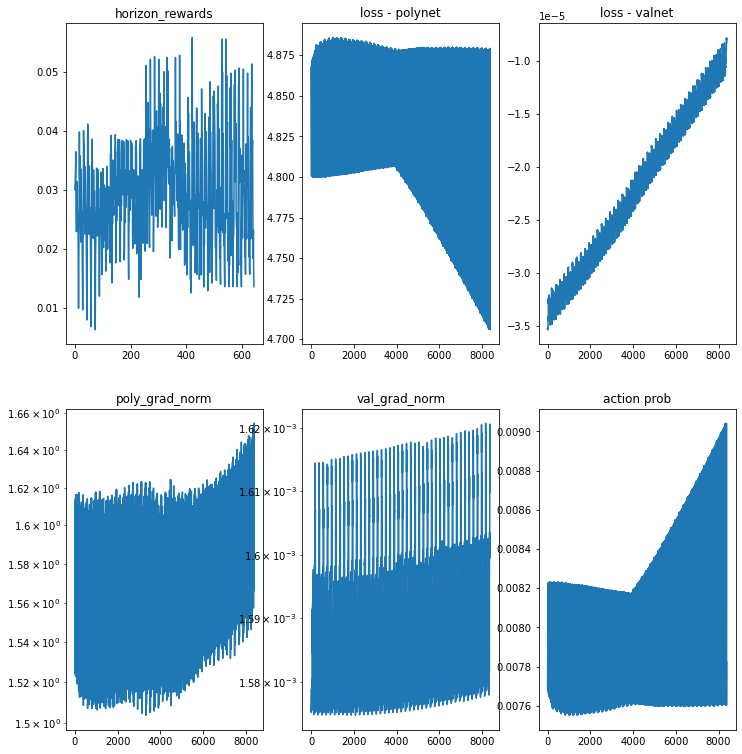

In [7]:
figsize = (12,13)
keys = list(hist.keys())
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=figsize)

axs[0,0].plot(hist['horizon_rewards'])
axs[0,0].set_title('horizon_rewards')

axs[0,1].plot(hist['poly_loss'])
axs[0,1].set_title('loss - polynet')
# axs[0,1].set_yscale('log')

axs[0,2].plot(hist['val_loss'])
axs[0,2].set_title('loss - valnet')
# axs[0,2].set_yscale('log')

axs[1,0].plot(hist['poly_grad_norm'])
axs[1,0].set_title('poly_grad_norm')
axs[1,0].set_yscale('log')

axs[1,1].plot(hist['val_grad_norm'])
axs[1,1].set_title('val_grad_norm')
axs[1,1].set_yscale('log')

axs[1,2].plot(hist['action_prob'])
axs[1,2].set_title('action prob')

plt.show()

In [9]:
hist_dir = '/home/huangz78/rl_samp/DQN_doubleQ_True_hist.pt'
data = torch.load(hist_dir)
hist = data['training_record']
print(hist.keys())

dict_keys(['loss', 'grad_norm', 'q_values_mean', 'q_values_std', 'horizon_rewards', 'rmse', 'recon_samples', 'rmse_rand', 'rmse_lowfreq', 'recon_samples_rand'])


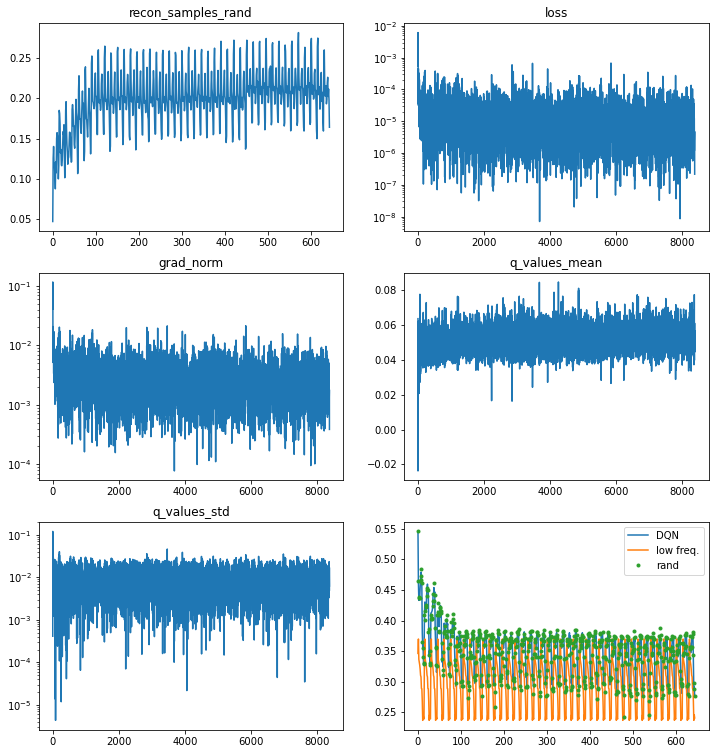

In [15]:
figsize = (12,13)
keys = list(hist.keys())
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=figsize)

axs[0,0].plot(hist['horizon_rewards'])
axs[0,0].set_title(keys[-1])

# loss_hist = [hist['loss'][i].item() for i in range(len(hist['loss']))]
axs[0,1].plot(hist['loss'])
axs[0,1].set_title(keys[0])
axs[0,1].set_yscale('log')

axs[1,0].plot(hist['grad_norm'])
axs[1,0].set_title(keys[1])
axs[1,0].set_yscale('log')


# q_values_mean_hist = [hist['q_values_mean'][i].item() for i in range(len(hist['q_values_mean']))]
axs[1,1].plot(hist['q_values_mean'])
axs[1,1].set_title(keys[2])

# q_values_std_hist = [hist['q_values_std'][i].item() for i in range(len(hist['q_values_std']))]
axs[2,0].plot(hist['q_values_std'])
axs[2,0].set_title(keys[3])
axs[2,0].set_yscale('log')

axs[2,1].plot(hist['rmse'],label='DQN')
axs[2,1].plot(hist['rmse_lowfreq'],label='low freq.')
axs[2,1].plot(hist['rmse_rand'],'.',linewidth=.5,label='rand')
axs[2,1].legend(loc='best')

plt.show()